## K-means (Iris data)

In [1]:
#Iris dataset: http://scikit-#learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data[0:5])
print(iris.target)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [2]:
from sklearn.cluster import KMeans

X = iris.data
Result = KMeans(n_clusters=3)
Result.fit(X)
labels = Result.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


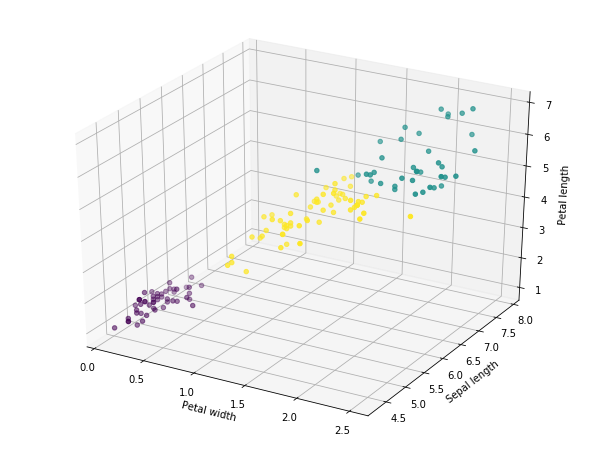

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

#Axes3D is part of Matplotlib, ref: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
#rect defines the rectangle, elev stores the elevation angle in the z plane, azim stores the azimuth angle in the x,y plane
#ax = Axes3D(fig, rect=[0, 0, .90, 1], elev=48, azim=134)
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
#X[:, 3] are the x's, X[:, 0] are the y's, X[:, 2] are the z's, c can be single color format str or a seq of color specs of lenN
# The labels are an array. labels.astype(np.float) casts to float
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

## K-means (NY Times)

In [70]:
import pandas as pd
import pylab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Ex_cluster_NY_Times_LARGE.csv' , sep=',', encoding='latin1')
print(df.head())
print(df.describe())
print(df.shape)

   Age  Gender  Impressions  Clicks  Signed_In
0   36       0            3       0          1
1   73       1            3       0          1
2   30       0            3       0          1
3   49       1            3       0          1
4   47       1           11       0          1
                 Age         Gender    Impressions         Clicks  \
count  458441.000000  458441.000000  458441.000000  458441.000000   
mean       29.482551       0.367037       5.007316       0.092594   
std        23.607034       0.481997       2.239349       0.309973   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       3.000000       0.000000   
50%        31.000000       0.000000       5.000000       0.000000   
75%        48.000000       1.000000       6.000000       0.000000   
max       108.000000       1.000000      20.000000       4.000000   

           Signed_In  
count  458441.000000  
mean        0.700930  
std         0.457851  
min 

In [71]:
# remove Age=0
df = df[df['Age']>0]
print(df.describe())
print(df.shape)

                 Age         Gender    Impressions         Clicks  Signed_In
count  321335.000000  321335.000000  321335.000000  321335.000000   321335.0
mean       42.062054       0.523644       5.010584       0.071480        1.0
std        16.308117       0.499441       2.238784       0.268659        0.0
min         7.000000       0.000000       0.000000       0.000000        1.0
25%        29.000000       0.000000       3.000000       0.000000        1.0
50%        41.000000       1.000000       5.000000       0.000000        1.0
75%        53.000000       1.000000       6.000000       0.000000        1.0
max       108.000000       1.000000      20.000000       3.000000        1.0
(321335, 5)


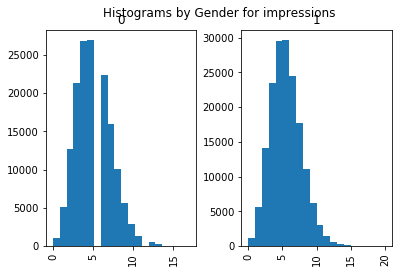

In [35]:
# See if the genders are unbalanced
df['Impressions'].hist(by=df['Gender'], bins=20)
pylab.suptitle("Histograms by Gender for impressions")

Both genders are almost the same.

   Age  Gender  Impressions  Clicks  Signed_In AgeGroups
0   36       0            3       0          1         4
1   73       1            3       0          1         7
2   30       0            3       0          1         3
3   49       1            3       0          1         5
4   47       1           11       0          1         5


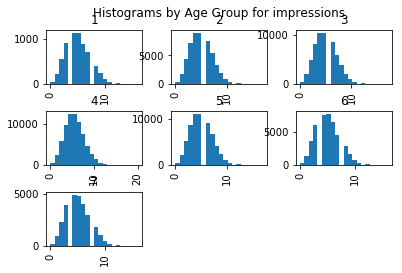

In [72]:
## Create AgeGroup
# Equiwidth - use pandas.cut() - You specify the number of bins.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
#names = range(1,6) or names = [1, 2, 3, 4, 5] or ["Age Group1", "Age Group 2", ...]
#bins1 = pd.cut(myData['Age'], 5, labels=labels)

## This is another option but is commented out
names = [1,2,3,4,5,6,7]
bins1=[0, 15, 25, 35, 45, 55, 65, 108]
df['AgeGroups'] = pd.cut(df['Age'], bins1, labels=names)
print(df.head())
df['Impressions'].hist(by=df['AgeGroups'], bins=20)
pylab.suptitle("Histograms by Age Group for impressions")

[1, 2, 3, 4, 5, 6, 7]
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]
1


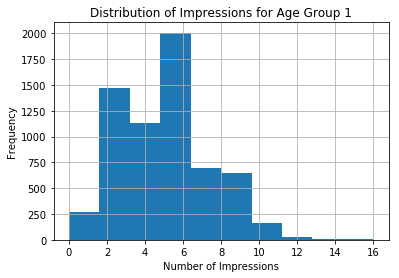

2


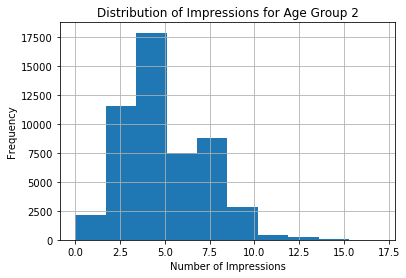

3


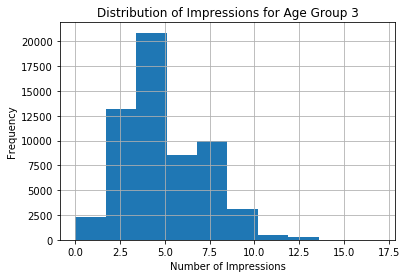

4


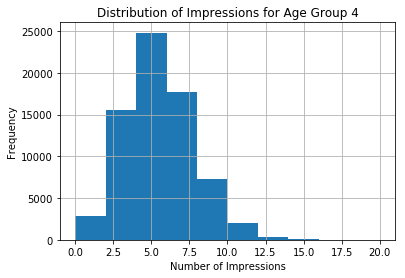

5


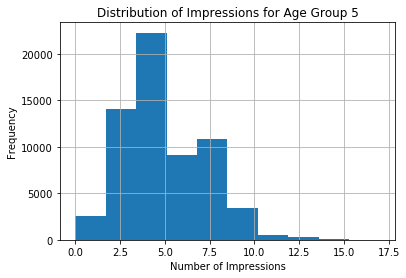

6


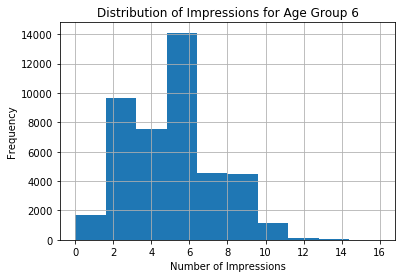

7


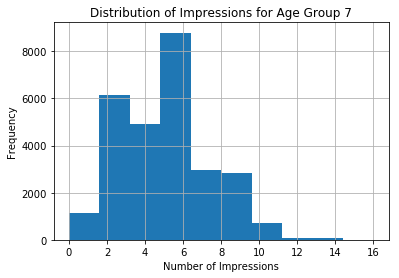

In [98]:
## Plot the distribution of the number of impressions for the age categories created.

# Get unique Age groups. Iterate through list and plot each histogram
ageSeries = df['AgeGroups'].unique()
ageSeries = ageSeries.sort_values()
print(ageSeries)

# Iterate through each age and generate the plot
count = 1
for age in ageSeries:
    print(age)
    # We need to select rows containing a particular age
    queryString = "AgeGroups == " + str(age)
    ageGroupImpressions = myData[['AgeGroups', 'Impressions']].query(queryString)
    # Create histogram and label it
    ageGroupImpressions['Impressions'].hist()
    titleLabel = "Distribution of Impressions for Age Group " + str(age)
    plt.title(titleLabel)
    plt.xlabel("Number of Impressions")
    plt.ylabel("Frequency")
    plt.show()
    plt.close()
    count += 1

In [51]:
# prepare the data for using K-means
df_new = df.drop('Age',axis=1)
print(df_new.head())

   Gender  Impressions  Clicks  Signed_In AgeGroups
0       0            3       0          1         4
1       1            3       0          1         7
2       0            3       0          1         3
3       1            3       0          1         5
4       1           11       0          1         5


In [54]:
# normalize data
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import decomposition

X = df_new.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
df_normalized = pd.DataFrame(X_scaled)
print(df_normalized[:10])

     0     1         2    3         4
0  0.0  0.15  0.000000  0.0  0.500000
1  1.0  0.15  0.000000  0.0  1.000000
2  0.0  0.15  0.000000  0.0  0.333333
3  1.0  0.15  0.000000  0.0  0.666667
4  1.0  0.55  0.000000  0.0  0.666667
5  0.0  0.55  0.333333  0.0  0.666667
6  0.0  0.25  0.000000  0.0  0.666667
7  0.0  0.15  0.000000  0.0  0.166667
8  0.0  0.20  0.000000  0.0  0.666667
9  0.0  0.15  0.000000  0.0  0.166667


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


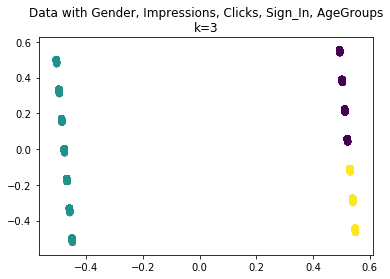

In [57]:
# Create clusters 
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
pca2D = decomposition.PCA(2)
plot_columns = pca2D.fit_transform(df_normalized)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.title("Data with Gender, Impressions, Clicks, Sign_In, AgeGroups\nk=3")
plt.show()

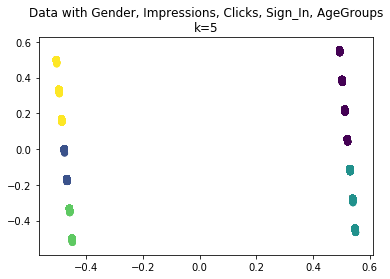

In [59]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_normalized)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
pca2D = decomposition.PCA(2)
plot_columns = pca2D.fit_transform(df_normalized)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.title("Data with Gender, Impressions, Clicks, Sign_In, AgeGroups\nk=5")
plt.show()

In [106]:
# add a variable ClickThrougRate
df['ClickThrougRate'] = df['Clicks'] / df['Impressions']*10
df_new2 = df.drop('Age', axis=1)
df_new2 = df_new2.dropna()
print(df_new2.head())
print(df_new2.describe())

   Gender  Impressions  Clicks  Signed_In AgeGroups  ClickThrougRate
0       0            3       0          1         4              0.0
1       1            3       0          1         7              0.0
2       0            3       0          1         3              0.0
3       1            3       0          1         5              0.0
4       1           11       0          1         5              0.0
              Gender    Impressions         Clicks  Signed_In  ClickThrougRate
count  319198.000000  319198.000000  319198.000000   319198.0    319198.000000
mean        0.523644       5.044129       0.071958        1.0         0.142536
std         0.499441       2.208280       0.269493        0.0         0.602797
min         0.000000       1.000000       0.000000        1.0         0.000000
25%         0.000000       3.000000       0.000000        1.0         0.000000
50%         1.000000       5.000000       0.000000        1.0         0.000000
75%         1.000000       6.0000

In [107]:
X = df_new2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
df_normalized = pd.DataFrame(X_scaled)
print(df_normalized[:5])

     0         1    2    3         4    5
0  0.0  0.105263  0.0  0.0  0.500000  0.0
1  1.0  0.105263  0.0  0.0  1.000000  0.0
2  0.0  0.105263  0.0  0.0  0.333333  0.0
3  1.0  0.105263  0.0  0.0  0.666667  0.0
4  1.0  0.526316  0.0  0.0  0.666667  0.0


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


[2 1 2 ..., 1 0 1]
[2 1 2 ..., 1 0 1]


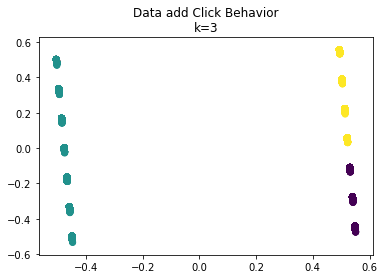

In [109]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)
labels = kmeans.labels_
print(labels)
centroids = kmeans.cluster_centers_
prediction = kmeans.predict(df_normalized)
print(prediction)

pca2D = decomposition.PCA(2)
plot_columns = pca2D.fit_transform(df_normalized)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.title("Data add Click Behavior\nk=3")
plt.show()

In [111]:
# See how it fits data on different dimensions
print(pd.crosstab(labels, df_new2['AgeGroups']))
print(pd.crosstab(labels, df_new2['Gender']))
print(pd.crosstab(labels, df_new2['Impressions']))

AgeGroups     1      2      3      4      5      6      7
row_0                                                    
0             0      0      0      0  29489  19977  17699
1          4345  28360  31089  37282  33218  23051   9801
2          2048  22621  27390  32828      0      0      0
Gender      0       1
row_0                
0       67165       0
1           0  167146
2       84887       0
Impressions    1      2      3      4      5      6      7      8     9   \
row_0                                                                      
0            2256   5626   9397  11933  11870   9855   7034   4446  2577   
1            5677  14092  23463  29523  29609  24465  17655  11120  6189   
2            2874   7124  11914  14976  15063  12494   8949   5603  3115   

Impressions    10    11   12   13  14  15  16  17  20  
row_0                                                  
0            1227   571  233   99  29   9   2   1   0  
1            3013  1385  597  241  82  22  10   2  

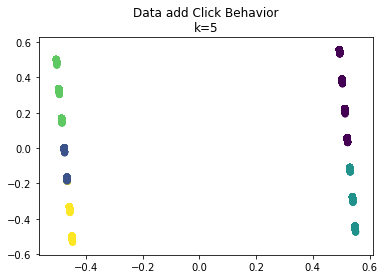

In [85]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_normalized)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
pca2D = decomposition.PCA(2)
plot_columns = pca2D.fit_transform(df_normalized)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.title("Data add Click Behavior\nk=5")
plt.show()

In [99]:
# CATEGORICAL VARIABLES
# Create a new variable that categorizes behavior based on click-thru rate.
# Create categories for click thru behavior. We can do this on the original data
def click_behavior (row):
   if row['Clicks'] > 0 :
      return 'Clicks'
   if row['Impressions'] == 0 :
      return 'noImpressions'
   if row['Impressions'] > 0 :
      return 'Impressions'

   return 'Other'

# Create a new variable that categorizes behavior based on click-thru rate.
# Create categories for click thru behavior. We can do this on the original data
df['clickBehavior']  = df.apply (lambda row: click_behavior (row),axis=1)
print(df['clickBehavior'].value_counts())

Impressions      415537
Clicks            39838
noImpressions      3066
Name: clickBehavior, dtype: int64


## DBSCAN

Stdand mean of original data : 0.56 and  0.0
Stdand mean of whitened data : 1.0 and  0.0
Stdand mean of original data : 0.72 and  0.38
Stdand mean of whitened data : 1.0 and  -0.0
Stdand mean of original data : 7.22 and  1.67
Stdand mean of whitened data : 1.0 and  -0.0


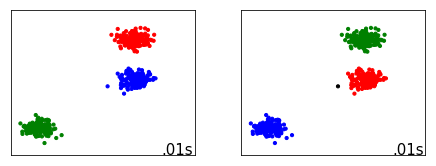

In [112]:

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
n_samples= 500
noisy_circles= datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons= datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
#Reference
#http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
#no_structure= np.random.rand(n_samples, 2)

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
clustering_names= ['KMeans','DBSCAN']
plt.figure(figsize=(6, 10))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.25,hspace=.25)
#Reference:
#http://matplotlib.org/faq/howto_faq.html

plot_num= 1
datasets = [noisy_circles, noisy_moons, blobs]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    print("Stdand mean of original data :", round(np.std(X),2), "and ", round(np.mean(X),2))
    # normalize dataset for easier parameter selection
    #Reference
    #http://scikit-#learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    X = StandardScaler().fit_transform(X)
    print("Stdand mean of whitened data :", round(np.std(X),2), "and ", round(np.mean(X),2))

dbscan= cluster.DBSCAN(eps=.2)
#eps: The maximum distance between two samples for them #to be considered as in the same neighborhood.
#ref:
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
# http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
KMeans=cluster.KMeans(n_clusters=3)
#n_clustersis your choice of k
clustering_algorithms= [KMeans, dbscan]

for name, algorithm in zip(clustering_names, clustering_algorithms):
    #record the time
    t0 = time.time()
    #run each cluster algorithm
    algorithm.fit(X)
    #note duration
    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        #cast labels to int
        # labels_ : Labels of each point
        y_pred= algorithm.labels_.astype(np.int)
    else:
        #kmeans:Predictthe closest cluster each X belongs to
        #http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
        y_pred= algorithm.predict(X)
    # plot –all of the following is in the for loop on the prevslide
    #reference
    #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
    plt.subplot(4, len(clustering_algorithms), plot_num)
    if i_dataset== 0:
        plt.title(name, size=18)
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
    #https://docs.python.org/3/library/functions.html#hasattr
    if hasattr(algorithm, 'cluster_centers_'):
        centers = algorithm.cluster_centers_
        center_colors= colors[:len(centers)]
        plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xticks(())
    plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 -t0)).lstrip('0'), transform=plt.gca().transAxes, size=15,
    horizontalalignment='right')
    plot_num+= 1
#Not in for loop –shows the plot
plt.show()